In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
%matplotlib inline

In [38]:
import warnings
warnings.filterwarnings('ignore')

In [63]:
from sklearn.learning_curve import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [39]:
news = pd.read_csv('uci-news-aggregator.csv')

In [40]:
news.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


In [41]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422419 entries, 0 to 422418
Data columns (total 8 columns):
ID           422419 non-null int64
TITLE        422419 non-null object
URL          422419 non-null object
PUBLISHER    422417 non-null object
CATEGORY     422419 non-null object
STORY        422419 non-null object
HOSTNAME     422419 non-null object
TIMESTAMP    422419 non-null int64
dtypes: int64(2), object(6)
memory usage: 25.8+ MB


In [42]:
news.describe()

,ID,TIMESTAMP
count,422419.000000,4.224190e+05
mean,211536.764594,1.400445e+12
std,122102.839707,3.733088e+09
min,1.000000,1.394470e+12
25%,105801.500000,1.397349e+12
50%,211655.000000,1.399990e+12
75%,317273.500000,1.403775e+12
max,422937.000000,1.409229e+12


In [43]:
def count_words(str):
    return len(str.split())

news['LENGTH'] = news['TITLE'].apply(count_words)    
news.head(5)

,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP,LENGTH
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698,12
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207,12
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550,11
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793,9
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027,8


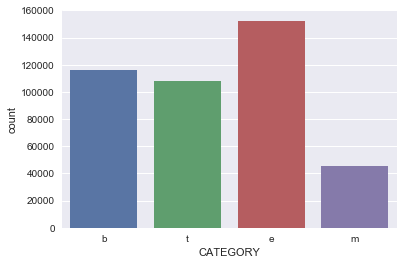

In [44]:
sns.countplot(x="CATEGORY", data=news)

In [45]:
X = news.TITLE
y = news.CATEGORY

In [46]:
from sklearn.cross_validation import train_test_split


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [48]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(295693,) (126726,) (295693,) (126726,)


In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import cross_val_score, KFold, train_test_split

In [50]:
from sklearn.pipeline import Pipeline

In [21]:
from sklearn.naive_bayes import MultinomialNB

# Initializing Pipline
pipelineNB = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   ====  analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Logistic Regression
])

# Training the model
pipelineNB.fit(X_train, y_train)

# Predictions
predictionsNB = pipelineNB.predict(X_test)

# Model Evaluation
print(classification_report(predictionsNB, y_test))

             precision    recall  f1-score   support

          b       0.91      0.90      0.90     35158
          e       0.97      0.95      0.96     46862
          m       0.85      0.97      0.91     12092
          t       0.90      0.90      0.90     32614

avg / total       0.92      0.92      0.92    126726



In [67]:
scoresNB = cross_val_score(pipelineNB, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresNB))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresNB.mean(), scoresNB.std()))
scoresNB = scoresNB.mean()

Cross-validation scores: [ 0.92101926  0.92235242  0.9230444   0.92143799  0.92427753]
Average cross-validation score: 0.92 +/- 0.00


Wall time: 1min 17s


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda_3\\lib\\site-packages\\matplotlib\\pyplot.py'>

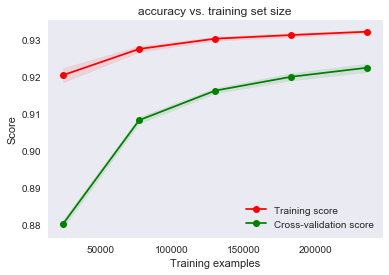

In [68]:
%time plot_learning_curve(pipelineNB, "accuracy vs. training set size", X_train, y_train, cv=5)

In [58]:
from sklearn.linear_model import LogisticRegression

pipelineLOG = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', LogisticRegression()),  # train on TF-IDF vectors w/ Logistic Regression
])
pipelineLOG.fit(X_train, y_train)
predictionsLOG = pipelineLOG.predict(X_test)

print(classification_report(predictionsLOG, y_test))

             precision    recall  f1-score   support

          b       0.92      0.92      0.92     34748
          e       0.98      0.96      0.97     46456
          m       0.91      0.96      0.93     13110
          t       0.92      0.93      0.93     32412

avg / total       0.94      0.94      0.94    126726



In [65]:
scoresLOG = cross_val_score(pipelineLOG, X_train, y_train, cv = 5)
print("Cross-validation scores: {}".format(scoresLOG))
print("Average cross-validation score: {:.2f} +/- {:.2f}".format(scoresLOG.mean(), scoresLOG.std()))
scoresLOG = scoresLOG.mean()

Cross-validation scores: [ 0.93726856  0.93985357  0.94049511  0.93922689  0.94164398]
Average cross-validation score: 0.94 +/- 0.00


Wall time: 3min 32s


<module 'matplotlib.pyplot' from 'C:\\ProgramData\\Anaconda_3\\lib\\site-packages\\matplotlib\\pyplot.py'>

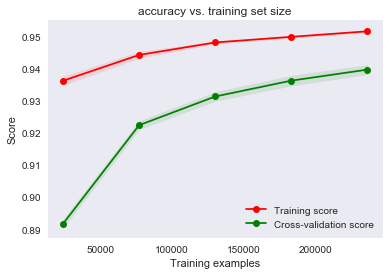

In [62]:
%time plot_learning_curve(pipelineLOG, "accuracy vs. training set size", X_train, y_train, cv=5)

In [19]:
from sklearn.tree import DecisionTreeClassifier

pipelineDT = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', DecisionTreeClassifier(max_depth=2,random_state=0)),  # train on TF-IDF vectors w/ Logistic Regression
])
pipelineDT.fit(X_train, y_train)
predictionsDT = pipelineDT.predict(X_test)

print(classification_report(predictionsDT, y_test))

             precision    recall  f1-score   support

          b       0.00      0.81      0.00        21
          e       1.00      0.38      0.55    120303
          m       0.00      0.00      0.00         0
          t       0.18      0.92      0.30      6402

avg / total       0.96      0.41      0.54    126726



In [20]:
scoresDT = cross_val_score(pipelineDT, X, y, cv = 5)
scoresDT = scoresDT.mean()

In [15]:
from sklearn.ensemble import RandomForestClassifier

pipelineRF = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier(n_estimators=1)),  # train on TF-IDF vectors w/ Logistic Regression
])
pipelineRF.fit(X_train, y_train)
predictionsRF = pipelineRF.predict(X_test)
print(classification_report(predictionsRF, y_test))

             precision    recall  f1-score   support

          b       0.78      0.77      0.77     35308
          e       0.86      0.84      0.85     47117
          m       0.71      0.76      0.73     12960
          t       0.75      0.78      0.76     31341

avg / total       0.80      0.80      0.80    126726



In [16]:
scoresRF = cross_val_score(pipelineRF, X, y, cv = 5)
scoresRF = scoresRF.mean()

In [17]:
from sklearn.linear_model import SGDClassifier

pipelineSV = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts   === analyzer=normalize_text
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, n_iter=5, random_state=42)),  # train on TF-IDF vectors w/ Logistic Regression
])
pipelineSV.fit(X_train, y_train)
predictionsSV = pipelineSV.predict(X_test)

print(classification_report(predictionsSV, y_test))

             precision    recall  f1-score   support

          b       0.81      0.86      0.83     32671
          e       0.98      0.77      0.86     58238
          m       0.60      0.94      0.73      8722
          t       0.75      0.90      0.82     27095

avg / total       0.86      0.83      0.84    126726



In [18]:
scoresSV = cross_val_score(pipelineSV, X, y, cv = 5)
scoresSV = scoresSV.mean()

In [25]:
from ipywidgets import widgets
from IPython.display import display
from IPython.display import clear_output

caption = widgets.Label('Enter an article here:')
text = widgets.Textarea()
button = widgets.Button(description="Classify")
display(caption,text,button)

def class_desc(p_class):
    if p_class == 'b':
        str = 'Business'
    elif p_class == 't':
        str = 'Science and Technology'
    elif p_class == 'e':
        str = 'Entertainment'
    elif p_class == 'm':
        str = 'Health'
    else:
        p_class = ''
    
    return str

def handle_submit(sender):
    message = text.value
    clear_output()
    results = pd.DataFrame({'model' : pd.Series(['NB', 'LOG','DT', 'RF', 'SV'], index=['1', '2', '3','4','5']),
                            'class' : pd.Series([pipelineNB.predict([message])[0], 
                                                 pipelineLOG.predict([message])[0], 
                                                 pipelineDT.predict([message])[0],
                                                 pipelineRF.predict([message])[0],
                                                 pipelineSV.predict([message])[0]], index=['1', '2', '3','4','5']),
                           'percent' : pd.Series([scoresNB, 
                                                 scoresLOG, 
                                                 scoresDT,
                                                 scoresRF,
                                                 scoresSV], index=['1', '2', '3','4','5'])})

    print(results)
    print('\n')
    errors_average = results['percent'].mean() - results['percent'].std()
    print('Most likely prediction: ', class_desc(results[results.percent >= errors_average].groupby('class')['percent'].mean().idxmax()))
    print('\n-----------------------------------------------------------------------')
    print('b = business, t = science and technology, e = entertainment, m = health')

button.on_click(handle_submit)


'''
   Testing Examples:
    - Testing examples:
    - IBM sales has grown 33% in the last 5 years
    - Pearson shareholders reject chief executive's £1.5m pay package 
    - World Bank transfers $5.6 million to PA
    - Child’s Play Is Good for All of Us
    - Why Kids Shouldn’t Sit Still in Class MARCH 21, 2017
    - Why Deep Breathing May Keep Us Calm
    - In Rare Unity, Hospitals, Doctors and Insurers Criticize Health Bill
    - Scientists can now count birds from space
    - What to expect with the iPhone 8
    - See Mark Hamill prank 'Star Wars' superfans
'''

  class model   percent
1     e    NB  0.857274
2     e   LOG  0.866251
3     e    DT  0.407534
4     e    RF  0.709634
5     e    SV  0.787789


Most likely prediction:  Entertainment

-----------------------------------------------------------------------
b = business, t = science and technology, e = entertainment, m = health


In [ ]:
import nltk
from nltk.collocations import *
nltk.download()
tokens = nltk.word_tokenize("ameen taha taha ameen")

#Create your bigrams
bgs = nltk.bigrams(tokens)

#compute frequency distribution for all the bigrams in the text
fdist = nltk.FreqDist(bgs)
for k,v in fdist.items():
    print (k,v)

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
